### Preparando Entorno 

In [ ]:
# Instalando librerias 

### Web scraping y manipulación de archivos pdf
import requests 
import bs4
from bs4 import BeautifulSoup
import PyPDF2 
from PyPDF2 import PdfReader

### NPL 
import spacy

### Dataframes y transformaciones 
import pandas as pd

### Visualización 
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### Web Scraping

In [ ]:
# Código de respuesta 

url_ipcc = 'https://www.ipcc.ch/report/ar6/wg2/'

def status_code_url(url):
    r=requests.get(url)
    if r.status_code == 200:
        s=BeautifulSoup(r.text, 'lxml')
    else:
        print("error no es correcto el status")
    return s

s = status_code_url(url_ipcc)
print(s)

In [ ]:
# Obteniendo links de descarga  

def link_reports(s):
    div_reports = s.find('div', attrs={"class":"gx-3 gy-3 row"})
    url_reports = [x.find('a').get('href') for x in div_reports]
    return url_reports
    
link_pdf_reports = link_reports(s)
print(link_pdf_reports)



In [ ]:
# Descarga local de 18 reportes IPCC  

def save_reports_ipcc(url, i):
    r=requests.get(url)
    with open('InformesIPCC/report' + str(i) + '.pdf', 'wb') as file:
        file.write(r.content)
    
i=0
while i<=len(link_pdf_reports):
    i+=1
    print(f'Estoy descargando el reporte: {i}')
    save_reports_ipcc(link_pdf_reports[i],i)

### Manipulación y Transformación de archivos

In [2]:
# Conteo de páginas 

report1_pdf = open("InformesIPCC/report4.pdf", "rb")
pdf_reader = PyPDF2.PdfFileReader(report1_pdf)
print(pdf_reader.getNumPages())


Xref table not zero-indexed. ID numbers for objects will be corrected.


194


In [ ]:
# Convirtiendo pdf a string   

pdf_reader = PdfReader("InformesIPCC/report4.pdf")
text_file_pdf = ""
for page in pdf_reader.pages:
    text_file_pdf += page.extract_text() + "\n"
    print(text_file_pdf)

In [6]:
# Longitud del archivo 

len(text_file_pdf)

1225727

In [4]:
# Dividiendo archivo en dos partes 

text_file_pdf_part1 = text_file_pdf[:612867]
text_file_pdf_part2 = text_file_pdf[612867:]

### NPL con SpaCy  

##### 1. Conteo de párrafos 

In [ ]:
# Número de párrafos: 1ra pate 
nlp = spacy.load("en_core_web_sm")
doc_first_part = nlp(text_file_pdf_part1)


for index, sentences in enumerate(doc_first_part.sents):
    print(f'{index}: {sentences}')


In [ ]:
# Número de párrafos: 2da pate 
nlp = spacy.load("en_core_web_sm")
doc_second_part= nlp(text_file_pdf_part1)


for index, sentences in enumerate(doc_second_part.sents):
    print(f'{index}: {sentences}')

##### 2. Anotaciones Linguisticas 

In [ ]:
# Anotaciones linguisticas: 1ra parte 

from tokenize import Token

for token in doc_first_part:
    token_text = token.text
    token_pos = token.pos_
    token_tag = token.tag_
    token_dep = token.dep_
    token_lemma = token.lemma_
    token_shape = token.shape_

    print(f"{token_text:>12}{token_lemma:>12}{token_pos:>12}{token_tag:>12}{token_dep:>12}{token_shape:>12}")


In [ ]:
# Anotaciones linguisticas: 2da parte

for token in doc_second_part:
    token_text = token.text
    token_lemma = token.lemma_
    token_pos = token.pos_
    token_tag = token.tag_
    token_dep = token.dep_
    token_shape = token.shape_

   
    print(f"{token_text:>12}{token_lemma:>12}{token_pos:>12}{token_tag:>12}{token_dep:>12}{token_shape:>12}")

In [12]:
# Expplicación de las anotaciones 

spacy.explain('GPE')

'Countries, cities, states'

##### 3. Frecuancia de palabras 

In [ ]:
# Top palabras 1ra parte 

from collections import Counter

words_firt_part = [token.text.lower() for token in doc_first_part
 if not token.is_stop and not token.is_punct  and not token.is_space]
 
counter_words_firt_part = Counter(words_firt_part)
top_words_firt_part = counter_words_firt_part.most_common(50)
print(top_words_firt_part)


In [ ]:
# Top palabras 2da parte 

words_second_part = [token.text.lower() for token in doc_second_part
 if not token.is_stop and not token.is_punct and not token.is_space]
 
counter_words_second_part = Counter(words_second_part)
top_words_second_part = counter_words_second_part.most_common(50)
print(top_words_second_part)

### Dataframe y Visualización

In [ ]:
# Top words en Dataframe 1ra parte 

df_top_words_firt_part = pd.DataFrame(top_words_firt_part)
df_top_words_firt_part.columns = ["Top_Words", "Count"]

df_top_words_firt_part

In [ ]:
# Top words en Dataframe 2da parte 

df_top_words_second_part = pd.DataFrame(top_words_second_part)
df_top_words_second_part.columns = ["Top_Words", "Count"]

df_top_words_second_part

In [56]:
# Unión y limpieza de datos 

total_df_top_words = pd.concat([df_top_words_firt_part, df_top_words_second_part])
total_df_top_words = total_df_top_words.loc[total_df_top_words['Top_Words'] != "al", :]
total_df_top_words = total_df_top_words.loc[total_df_top_words['Top_Words'] != "et", :]
total_df_top_words = total_df_top_words.iloc[1:,:]
total_df_top_words

,Top_Words,Count
3,climate,895
4,food,762
5,2019,712
6,2018,707
7,change,585
...,...,...
45,doi:10.1038,153
46,water,151
47,agric,151
48,ecol,151


In [57]:
# Cambiando de dataframe a str 

str_top_words = total_df_top_words.to_string(index=False)

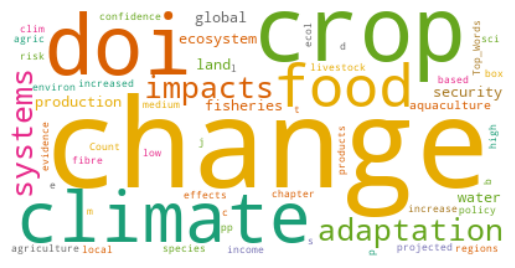

In [77]:
# Visualización frecuencia de palabras 

wordcloud = WordCloud(max_font_size=100, background_color="white", colormap="Dark2").generate(str_top_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Retornar oraciones con las palabras mas frecuentes 

from spacy.matcher import Matcher

test_doc_second_part = nlp(text_file_pdf_part2)

pattern = [{"TEXT": "climate"}]


matcher = Matcher(nlp.vocab)
matcher.add("QUOTE", [pattern])


for match_id, start, end in matcher(test_doc_second_part):
    test = test_doc_second_part.vocab.strings[match_id], test_doc_second_part[start:end].sent
    print(test)